<a href="https://colab.research.google.com/github/jaya3126/Decision-Tree-/blob/main/Fraud_check_Desicion_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

In [6]:
data = pd.read_csv("Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [7]:
df = data.rename(columns = {'Marital.Status':'Mar_st' , 'Taxable.Income': 'tax_in','City.Population':'city_pl','Work.Experience':'Wrk_exp'}, inplace = False)

In [8]:
df

,Undergrad,Mar_st,tax_in,city_pl,Wrk_exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [9]:
df.corr()

,tax_in,city_pl,Wrk_exp
tax_in,1.000000,-0.064387,-0.001818
city_pl,-0.064387,1.000000,0.013135
Wrk_exp,-0.001818,0.013135,1.000000


In [10]:
from matplotlib import pyplot

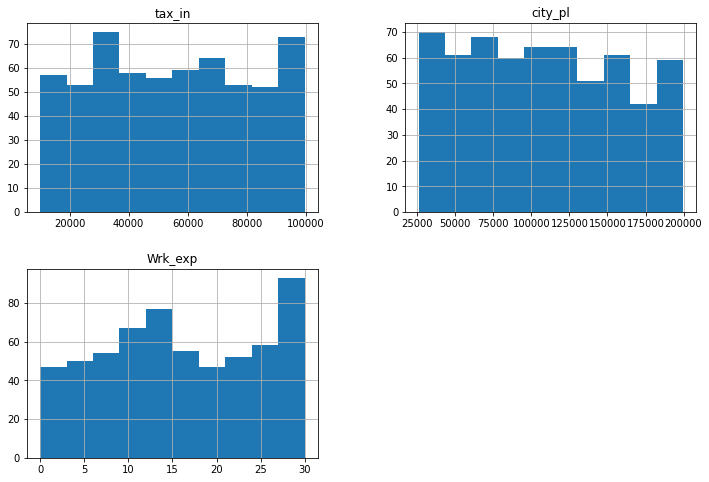

In [11]:
# histograms
df.hist(figsize=(12, 8))
pyplot.show()

In [12]:
encoder = LabelEncoder()
df['Undergrad'] = encoder.fit_transform(df['Undergrad'])
df['Mar_st'] = encoder.fit_transform(df['Mar_st'])
df['Urban'] = encoder.fit_transform(df['Urban'])


In [13]:
df.head()

,Undergrad,Mar_st,tax_in,city_pl,Wrk_exp,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [15]:

df['status'] = df['tax_in'].apply(lambda tax_in: 'Risky' if tax_in <= 30000 else 'Good')

In [16]:
df.head()

,Undergrad,Mar_st,tax_in,city_pl,Wrk_exp,Urban,status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [17]:
df['status'] = encoder.fit_transform(df['status'])

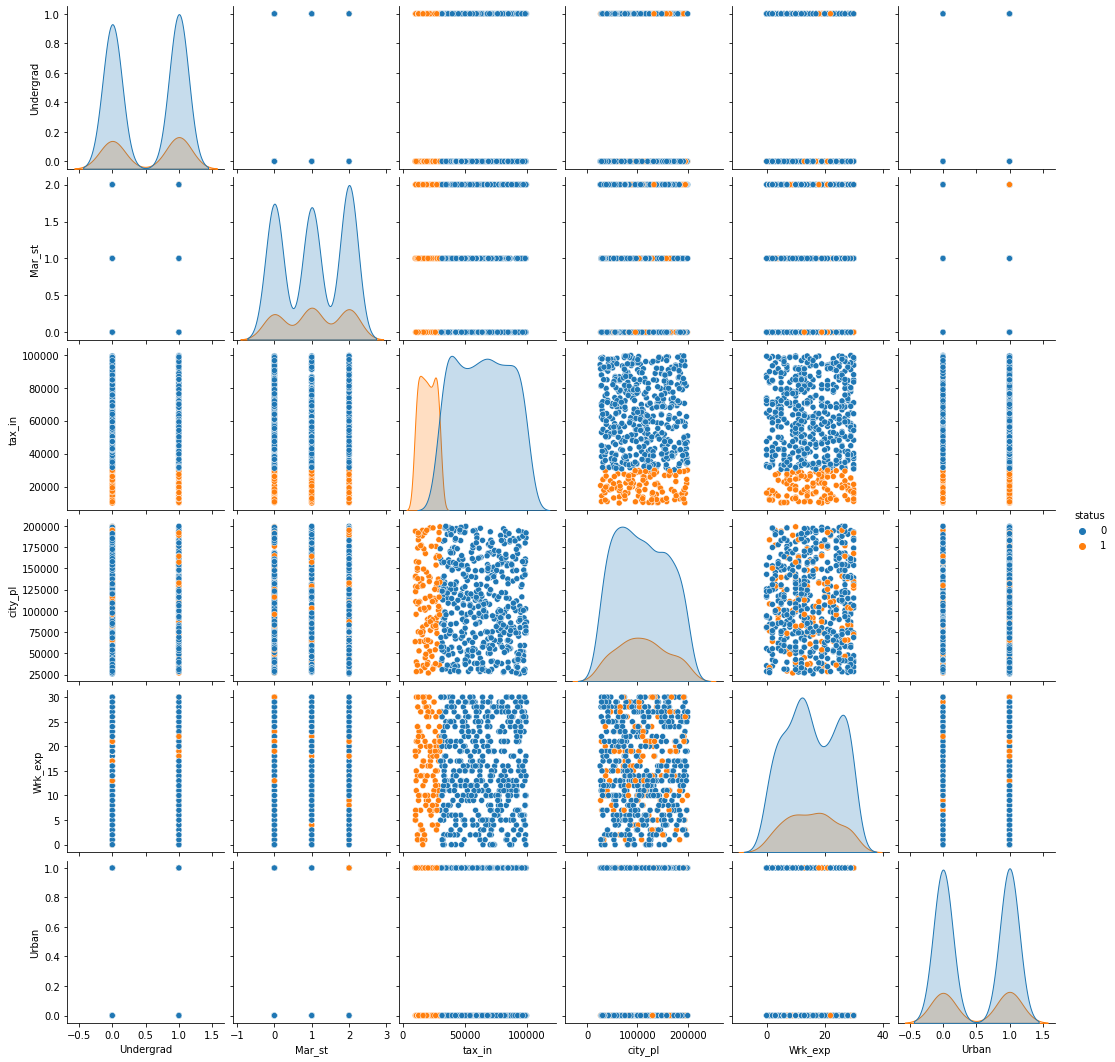

In [18]:
sns.pairplot(df,hue='status')

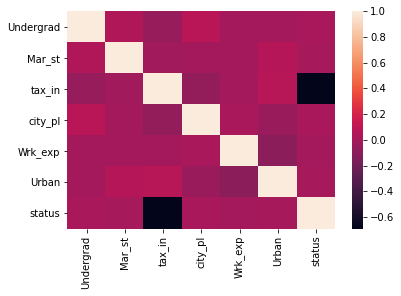

In [20]:
sns.heatmap(df.corr())

In [21]:
df.drop(['tax_in'],inplace=True,axis=1)

In [22]:
X = df.iloc[:,0:5]
y = df.iloc[:,5]

In [40]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.20, random_state=42)

In [41]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

[Text(141.64615384615385, 190.26, 'X[2] <= 60294.5\nentropy = 0.73\nsamples = 480\nvalue = [382, 98]'),
 Text(51.50769230769231, 135.9, 'X[3] <= 6.5\nentropy = 0.602\nsamples = 102\nvalue = [87, 15]'),
 Text(25.753846153846155, 81.53999999999999, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(77.26153846153846, 81.53999999999999, 'X[0] <= 0.5\nentropy = 0.672\nsamples = 85\nvalue = [70, 15]'),
 Text(51.50769230769231, 27.180000000000007, 'entropy = 0.426\nsamples = 46\nvalue = [42, 4]'),
 Text(103.01538461538462, 27.180000000000007, 'entropy = 0.858\nsamples = 39\nvalue = [28, 11]'),
 Text(231.7846153846154, 135.9, 'X[2] <= 64532.5\nentropy = 0.759\nsamples = 378\nvalue = [295, 83]'),
 Text(180.27692307692308, 81.53999999999999, 'X[3] <= 23.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]'),
 Text(154.52307692307693, 27.180000000000007, 'entropy = 0.863\nsamples = 7\nvalue = [2, 5]'),
 Text(206.03076923076924, 27.180000000000007, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 T

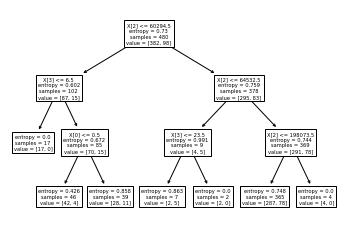

In [42]:
tree.plot_tree(model)

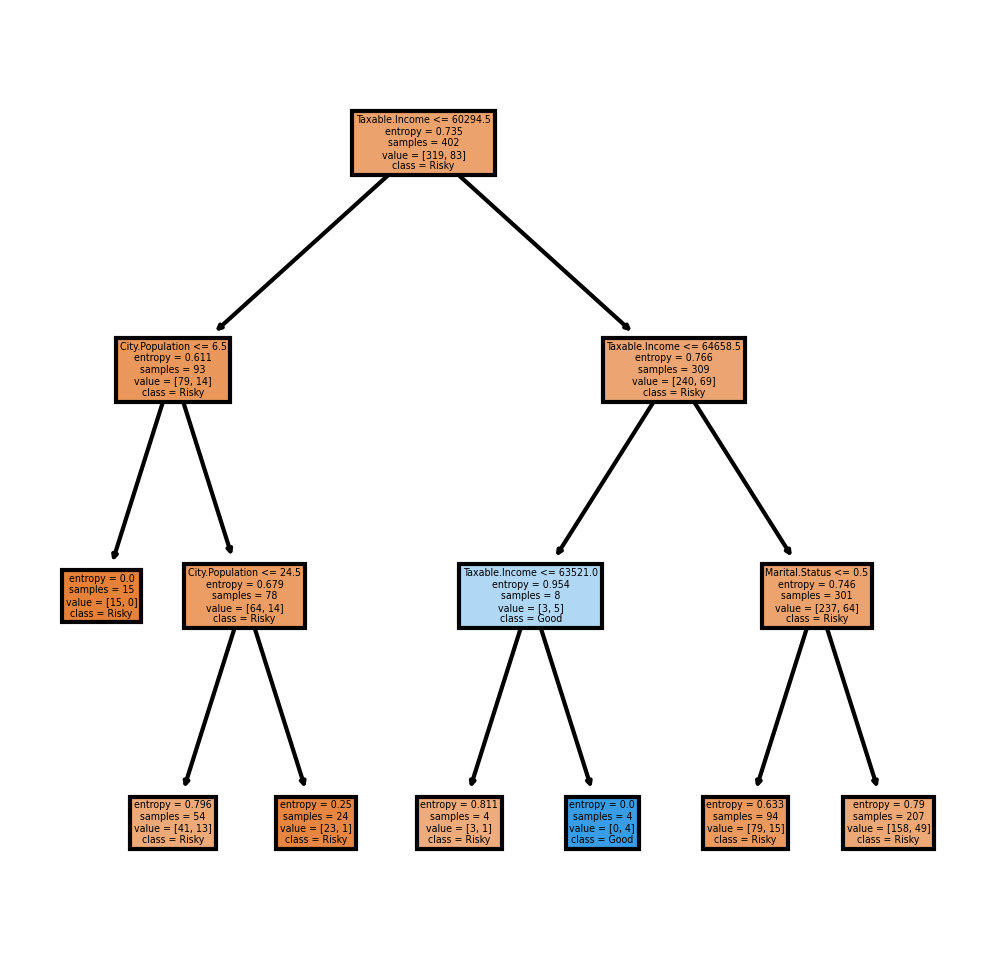

In [29]:
fn=['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban']
cn=["Risky",'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [43]:
preds = model.predict(X_test)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
X_test

,Undergrad,Mar_st,city_pl,Wrk_exp,Urban
110,0,2,32450,19,1
419,0,1,138074,20,0
565,0,0,31064,28,0
77,1,1,118344,26,0
181,0,0,36116,20,0
...,...,...,...,...,...
399,0,2,74497,21,0
340,1,1,54437,21,1
148,0,1,197038,21,0
494,0,2,197045,13,1


In [48]:
np.mean(preds==y_test)

0.7666666666666667

In [49]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87        94
           1       0.00      0.00      0.00        26

    accuracy                           0.77       120
   macro avg       0.39      0.49      0.43       120
weighted avg       0.61      0.77      0.68       120



In [50]:
print(confusion_matrix(y_test,preds))

[[92  2]
 [26  0]]


## Decision tree by gini method



In [35]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)
model_gini.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [37]:
pred_gini = model.predict(X_test)
pred_gini

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
#Find the accuracy
model.score(X_test,y_test)

0.7878787878787878

In [39]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       157
           1       0.00      0.00      0.00        41

    accuracy                           0.79       198
   macro avg       0.40      0.50      0.44       198
weighted avg       0.63      0.79      0.70       198



from both entropy and gini method accuracy is same.
although model accuracy is above the acceptance value (more than 70 %)but model is not good predict risky group in confusion metrix.
its poor to predict risky group.

---



---

